## Flight Ticket Price Prediction

->Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable.

->Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
pd.set_option("display.max_row",None)
pd.set_option("display.max_column",None)
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [108]:
df=pd.read_excel("flight_ticket.xlsx")

In [109]:
df

Airline Date_of_Journey    Source  \
0                                 IndiGo      24/03/2019  Banglore   
1                              Air India       1/05/2019   Kolkata   
2                            Jet Airways       9/06/2019     Delhi   
3                                 IndiGo      12/05/2019   Kolkata   
4                                 IndiGo      01/03/2019  Banglore   
5                               SpiceJet      24/06/2019   Kolkata   
6                            Jet Airways      12/03/2019  Banglore   
7                            Jet Airways      01/03/2019  Banglore   
8                            Jet Airways      12/03/2019  Banglore   
9                      Multiple carriers      27/05/2019     Delhi   
10                             Air India       1/06/2019     Delhi   
11                                IndiGo      18/04/2019   Kolkata   
12                             Air India      24/06/2019   Chennai   
13                           Jet Airways       9/05/2019   Kolkata   
14                                IndiGo      24/04/2019   Kolkata   
15                             Air India       3/03/2019     Delhi   
16                              SpiceJet      15/04/2019     Delhi   
17                           Jet Airways      12/06/2019     Delhi   
18                             Air India      12/06/2019     Delhi   
19                           Jet Airways      27/05/2019     Delhi   
20                                 GoAir       6/03/2019     Delhi   
21                             Air India      21/03/2019  Banglore   
22                                IndiGo       3/04/2019  Banglore   
23                                IndiGo       1/05/2019  Banglore   
24                           Jet Airways       6/05/2019   Kolkata   
25                           Jet Airways       9/06/2019     Delhi   
26                                IndiGo       1/06/2019     Delhi   
27                                 GoAir      15/05/2019     Delhi   
28                               Vistara      18/06/2019  Banglore   
29                               Vistara      15/06/2019   Chennai   
30                               Vistara      18/06/2019   Chennai   
31                             Air India       1/05/2019   Kolkata   
32                                IndiGo       6/04/2019  Banglore   
33                           Jet Airways      15/06/2019     Delhi   
34                           Jet Airways      18/05/2019     Delhi   
35                                IndiGo      27/06/2019     Delhi   
36                              SpiceJet      21/05/2019   Kolkata   
37                             Air India      18/05/2019   Kolkata   
38                           Jet Airways      06/03/2019  Banglore   
39                           Jet Airways       3/06/2019     Delhi   
40                     Multiple carriers      21/05/2019     Delhi   
41                             Air India      15/03/2019  Banglore   
42                           Jet Airways      18/05/2019     Delhi   
43                              Air Asia       6/05/2019  Banglore   
44                     Multiple carriers      21/03/2019     Delhi   
45                              SpiceJet      24/03/2019  Banglore   
46                                IndiGo      27/05/2019  Banglore   
47                             Air India       3/05/2019   Chennai   
48                             Air India      15/05/2019   Kolkata   
49                           Jet Airways      27/06/2019     Delhi   
50                           Jet Airways       9/03/2019     Delhi   
51                           Jet Airways       1/05/2019   Kolkata   
52                                IndiGo      24/03/2019  Banglore   
53                                IndiGo      18/06/2019  Banglore   
54                              Air Asia       3/04/2019  Banglore   
55                           Jet Airways      24/03/2019   Kolkata   
56                             Air India   

In [110]:
df.shape

(10683, 11)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [112]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [113]:
df.describe(include="all")

Airline Date_of_Journey Source Destination            Route  \
count         10683           10683  10683       10683            10682   
unique           12              44      5           6              128   
top     Jet Airways      18/05/2019  Delhi      Cochin  DEL → BOM → COK   
freq           3849             504   4537        4537             2376   
mean            NaN             NaN    NaN         NaN              NaN   
std             NaN             NaN    NaN         NaN              NaN   
min             NaN             NaN    NaN         NaN              NaN   
25%             NaN             NaN    NaN         NaN              NaN   
50%             NaN             NaN    NaN         NaN              NaN   
75%             NaN             NaN    NaN         NaN              NaN   
max             NaN             NaN    NaN         NaN              NaN   

       Dep_Time Arrival_Time Duration Total_Stops Additional_Info  \
count     10683        10683    10683       10682           10683   
unique      222         1343      368           5              10   
top       18:55        19:00   2h 50m      1 stop         No info   
freq        233          423      550        5625            8345   
mean        NaN          NaN      NaN         NaN             NaN   
std         NaN          NaN      NaN         NaN             NaN   
min         NaN          NaN      NaN         NaN             NaN   
25%         NaN          NaN      NaN         NaN             NaN   
50%         NaN          NaN      NaN         NaN             NaN   
75%         NaN          NaN      NaN         NaN             NaN   
max         NaN          NaN      NaN         NaN             NaN   

               Price  
count   10683.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean     9087.064121  
std      4611.359167  
min      1759.000000  
25%      5277.000000  
50%      8372.000000  
75%     12373.000000  
max     79512.000000

In [114]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There is only single entry is missing in Route and Total_stops.

In [115]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [116]:
df.sort_values('Date_of_Journey',inplace = True)

 Converting the Date_of_journey into date, month and year.

In [117]:
df['year'] = pd.DatetimeIndex(df['Date_of_Journey']).year
df['month'] = pd.DatetimeIndex(df['Date_of_Journey']).month
df['Day'] = pd.DatetimeIndex(df['Date_of_Journey']).day

In [118]:
df['Additional_Info'].unique()

array(['No info', '1 Long layover', 'Business class', 'Red-eye flight',
       'Change airports', '2 Long layover', 'No Info', '1 Short layover',
       'In-flight meal not included', 'No check-in baggage included'],
      dtype=object)

### Data Visualization 

Text(0, 0.5, 'Price of ticket')

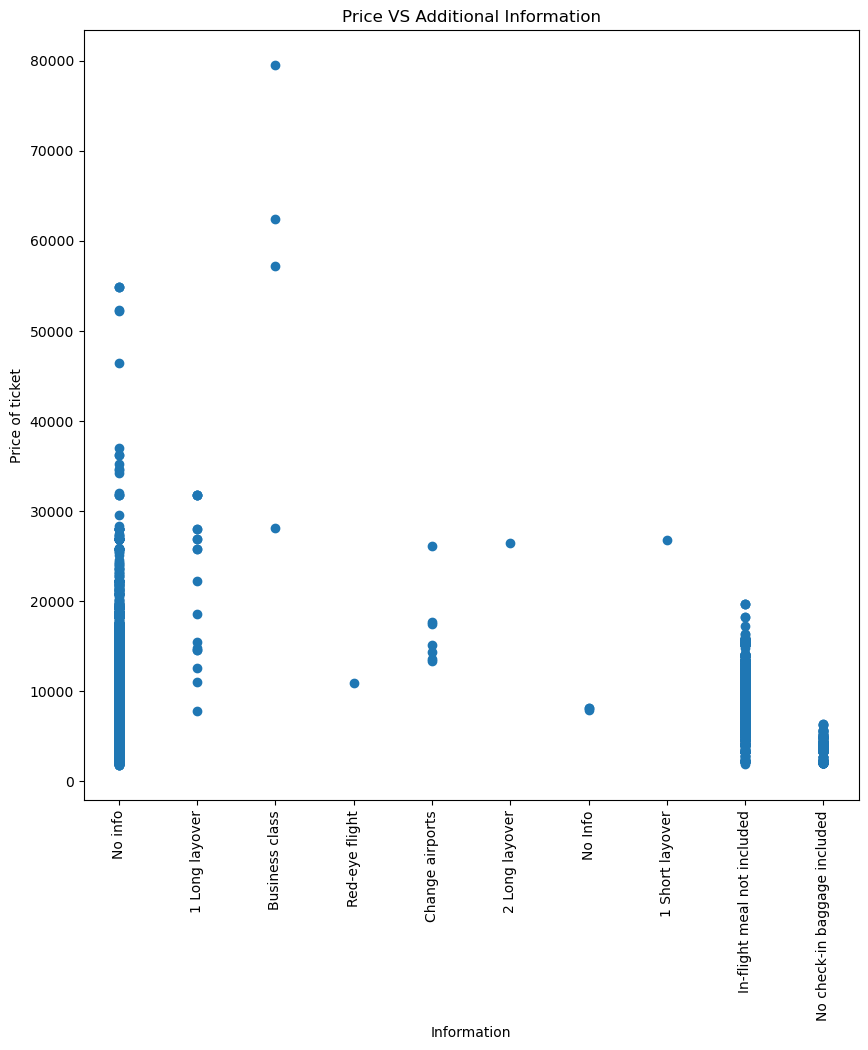

In [119]:
plt.figure(figsize = (10, 10))
plt.title('Price VS Additional Information')
plt.scatter(df['Additional_Info'], df['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Information')
plt.ylabel('Price of ticket')

From above scatter plot it is clear that we can see the ticket prices for Business class is higher which is quite obivious.

Text(0, 0.5, 'Count of flights')

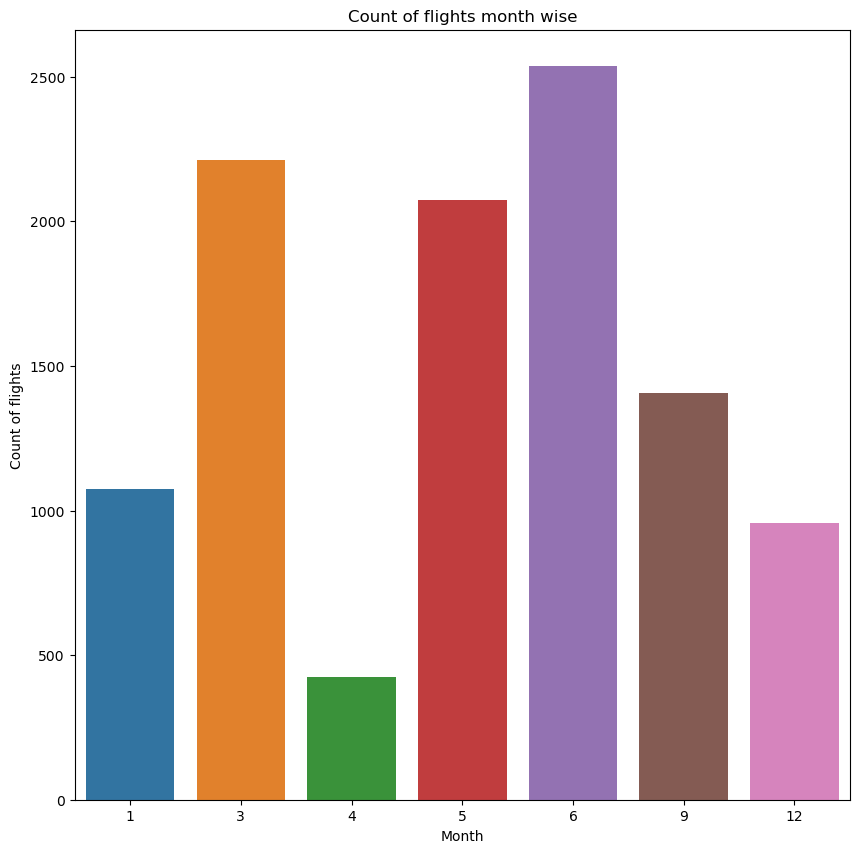

In [120]:
plt.figure(figsize = (10 , 10))
plt.title('Count of flights month wise')
sns.countplot(x = 'month', data = df)
plt.xlabel('Month')
plt.ylabel('Count of flights')

There are around 2500 flights scheduled in the month of may so at this time can be the peak month for the airlines as compared to april which seems like slack season for airlines.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Air India'),
  Text(1, 0, 'Jet Airways'),
  Text(2, 0, 'IndiGo'),
  Text(3, 0, 'Jet Airways Business'),
  Text(4, 0, 'Air Asia'),
  Text(5, 0, 'SpiceJet'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'GoAir'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Multiple carriers'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

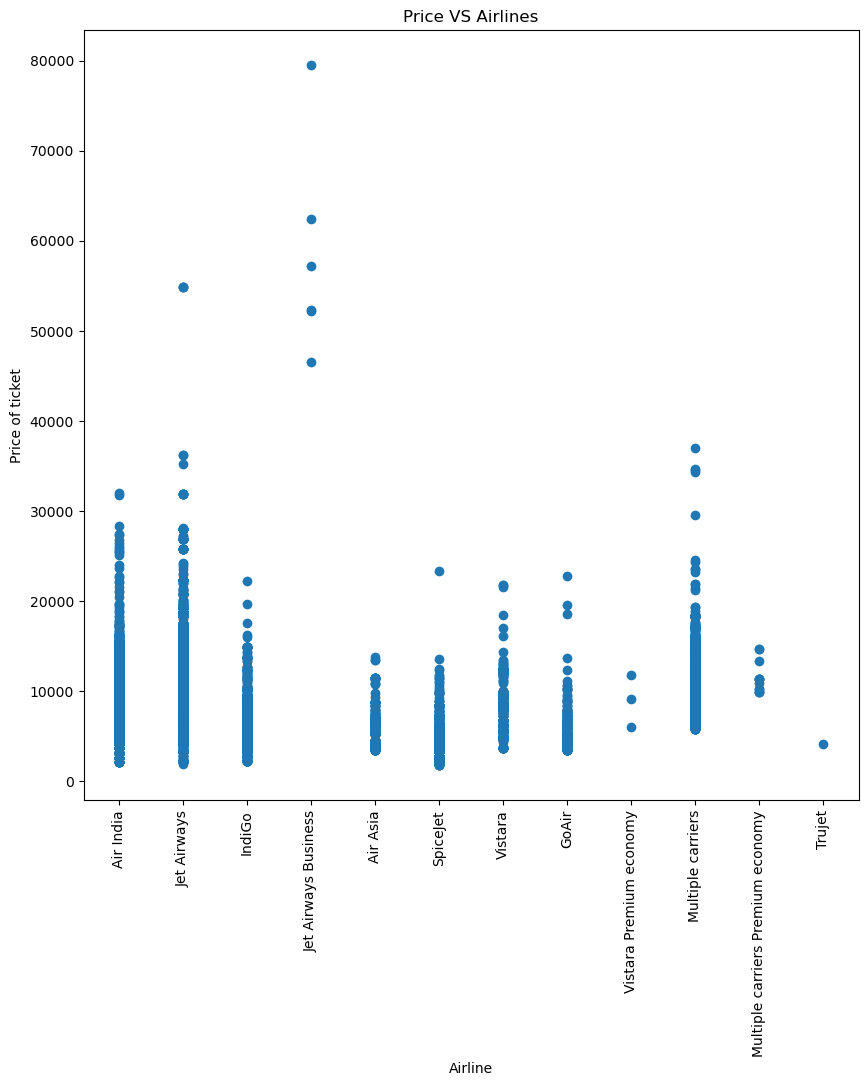

In [121]:
plt.figure(figsize = (10, 10))
plt.title('Price VS Airlines')
plt.scatter(df['Airline'], df['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

The ticket rate for Jet Airways Business airline is high.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Air India'),
  Text(1, 0, 'Jet Airways'),
  Text(2, 0, 'IndiGo'),
  Text(3, 0, 'Jet Airways Business'),
  Text(4, 0, 'Air Asia'),
  Text(5, 0, 'SpiceJet'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'GoAir'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Multiple carriers'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

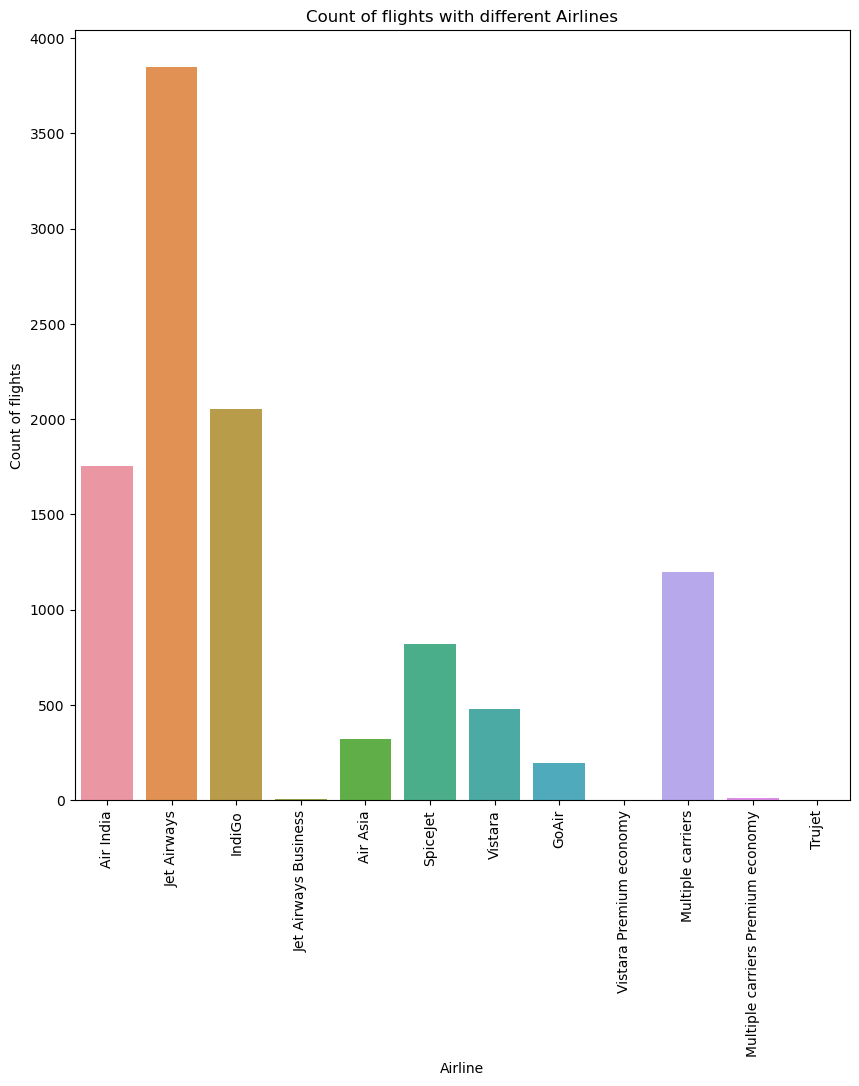

In [122]:
plt.figure(figsize = (10, 10))
plt.title('Count of flights with different Airlines')
sns.countplot(x = 'Airline', data = df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)

-> There are more number of flights of Jet Airways.

-> Jet Airways Business, Vistara Premium economy, Trujet have actually almost negligible flights.

Converting sparse classes of Airline into one category:

In [123]:
df['Airline'].replace(['Trujet', 'Vistara Premium economy'], 'Another', inplace = True)

Converting the Total_Stops into numbers and dropping the rows with NaN:.

In [124]:
df[df['Total_Stops'].isnull()]

Airline Date_of_Journey Source Destination Route Dep_Time  \
9039  Air India       6/05/2019  Delhi      Cochin   NaN    09:45   

      Arrival_Time Duration Total_Stops Additional_Info  Price  year  month  \
9039  09:25 07 May  23h 40m         NaN         No info   7480  2019      6   

      Day  
9039    5

In [125]:
df.dropna(axis = 0, inplace = True)

In [126]:
def convert_into_stops(X):
    if X == '4 stops':
        return 4
    elif X == '3 stops':
        return 3
    elif X == '2 stops':
        return 2
    elif X == '1 stop':
        return 1
    elif X == 'non stop':
        return 0

In [127]:
df['Total_Stops'] = df['Total_Stops'].map(convert_into_stops)

In [128]:
df.fillna(0, inplace  = True)
df['Total_Stops'] = df['Total_Stops'].apply(lambda x : int(x))

Converting the flight Dep_Time into proper time i.e. mid_night, morning, afternoon and evening:.

In [129]:
def flight_dep_time(X):
    if int(X[:2]) >= 0 and int(X[:2]) < 6:
        return 'mid_night'
    elif int(X[:2]) >= 6 and int(X[:2]) < 12:
        return 'morning'
    elif int(X[:2]) >= 12 and int(X[:2]) < 18:
        return 'afternoon'
    elif int(X[:2]) >= 18 and int(X[:2]) < 24:
        return 'evening'

In [130]:
df['flight_time'] = df['Dep_Time'].apply(flight_dep_time)

Text(0, 0.5, 'Count of flights')

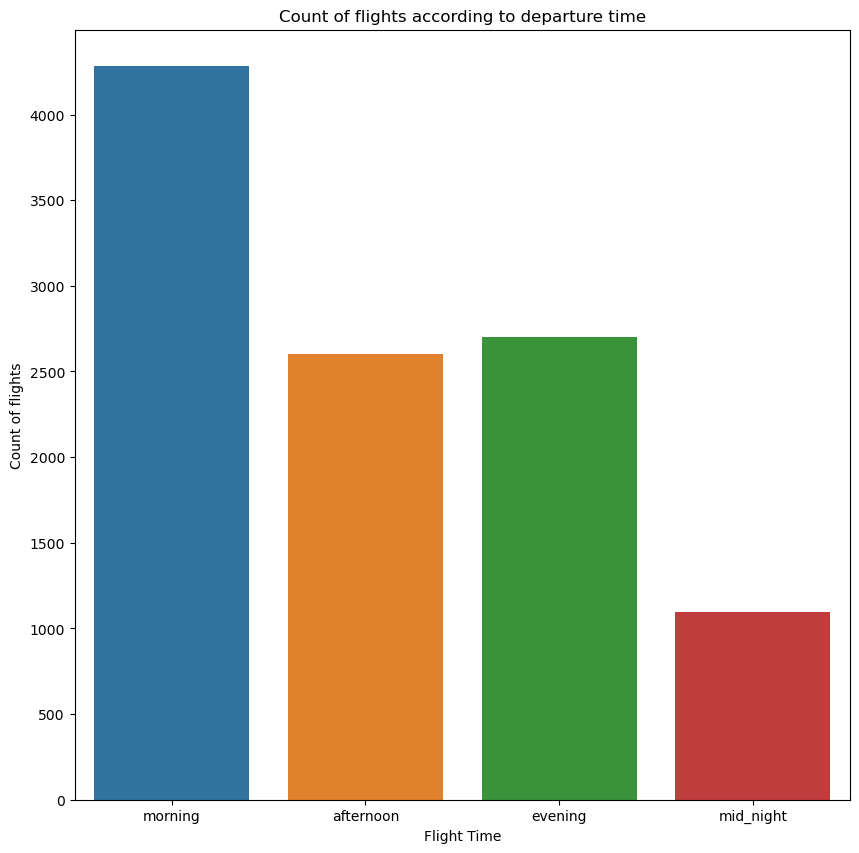

In [131]:
plt.figure(figsize = (10, 10))
plt.title('Count of flights according to departure time')
sns.countplot(x = 'flight_time', data = df)
plt.xlabel('Flight Time')
plt.ylabel('Count of flights')

There are more number of flights in the morning time as compared to other time.

Converting the flight duration into seconds:

In [132]:
import re
def convert_into_seconds(X):
    a = [int(s) for s in re.findall(r'-?\d+\.?\d*', X)]
    if len(a) == 2:
        hr = a[0] * 3600
        min = a[1] * 60
    else:
        hr = a[0] * 3600
        min = 0   
    total = hr + min
    return total
df['Duration(sec)'] = df['Duration'].map(convert_into_seconds)

Text(0, 0.5, 'Price of ticket')

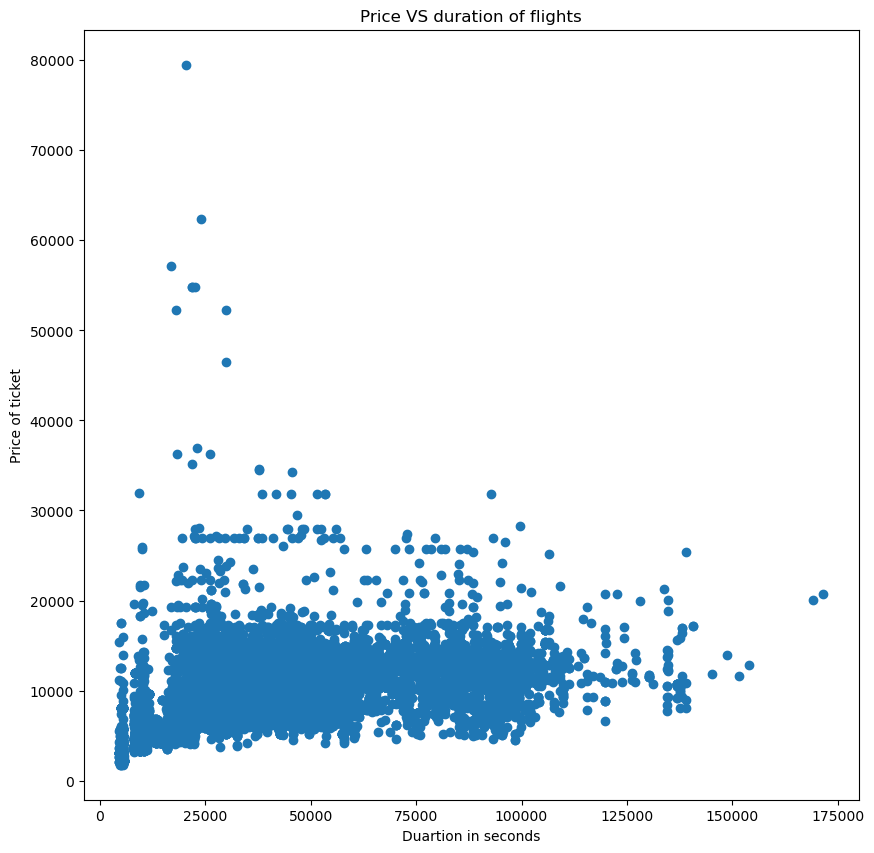

In [133]:
plt.figure(figsize = (10, 10))
plt.title('Price VS duration of flights')
plt.scatter(df['Duration(sec)'], df['Price'])
plt.xlabel('Duartion in seconds')
plt.ylabel('Price of ticket')

In [134]:
df.corr()

Total_Stops     Price  year     month       Day  Duration(sec)
Total_Stops       1.000000  0.603897   NaN  0.065495 -0.024136       0.738204
Price             0.603897  1.000000   NaN  0.010705 -0.165448       0.506604
year                   NaN       NaN   NaN       NaN       NaN            NaN
month             0.065495  0.010705   NaN  1.000000 -0.264896       0.055147
Day              -0.024136 -0.165448   NaN -0.264896  1.000000      -0.038422
Duration(sec)     0.738204  0.506604   NaN  0.055147 -0.038422       1.000000

It is important to notice that the correlation for 'year' is shown NaN.This is because that feature is not vary at all.

###### Dropping the duplicate rows:

In [135]:
df.shape

(10682, 16)

In [136]:
df = df.drop_duplicates()
df.shape

(10462, 16)

In [137]:
df['Additional_Info'].unique()

array(['No info', '1 Long layover', 'Business class', 'Red-eye flight',
       'Change airports', '2 Long layover', 'No Info', '1 Short layover',
       'In-flight meal not included', 'No check-in baggage included'],
      dtype=object)

No info' is same as 'No Info'. So replacing them with single common label.

In [138]:
df['Additional_Info'].replace('No Info', 'No info', inplace = True)

<Axes: >

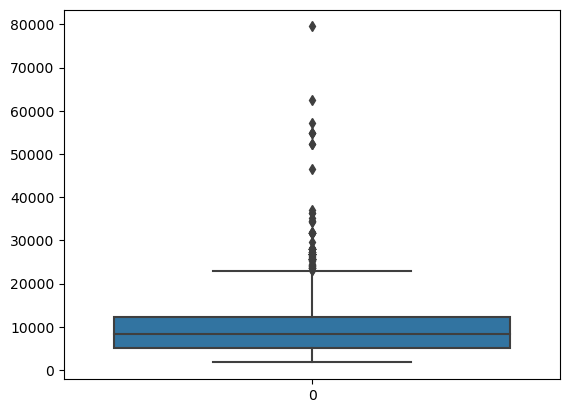

In [139]:
sns.boxplot(df['Price'])

As we can see that there are some points which are seeems like outliers but we cannot remove them because these can be flight ticket price also.

###### Encoding the dummy varibales (for categorical features):

In [140]:
df = pd.get_dummies(df, columns = ['Airline', 'Source', 'Destination', 'Additional_Info', 'flight_time'])

##### Removing the unused features:

In [141]:
df.drop(['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration'], axis = 1, inplace = True)

### Preparing the data for ML models:

In [142]:
X = df.drop('Price', axis = 1)
y = df['Price']

###### Data Standardization

In [143]:
s = StandardScaler()
X = s.fit_transform(X)

In [144]:
# Splitting data into train and test data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=0)

In [145]:
model_1=LinearRegression()
model_1.fit(X_train,y_train)

LinearRegression()

In [146]:
model_1.score(X_train,y_train)

0.6833308943625923

In [147]:
model_1.score(X_test,y_test)

0.6908021762775277

### Ridge Regression

In [148]:
model_1=Ridge()
model_1.fit(X_train,y_train)

Ridge()

In [149]:
model_1.score(X_train,y_train)

0.6833303835100695

In [150]:
model_1.score(X_test,y_test)

0.6907795647934126

### Lasso Regression

In [151]:
model_1=Lasso()
model_1.fit(X_train,y_train)

Lasso()

In [152]:
model_1.score(X_train,y_train)

0.6833292276965006

In [153]:
model_1.score(X_test,y_test)

0.690745173374014

In [154]:
####

In [155]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # alpha is the tuning parameter
ridge_model.fit(X_train, y_train)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)  # alpha is the tuning parameter
lasso_model.fit(X_train, y_train)

# Evaluate the models
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)

ridge_rmse = mean_squared_error(y_test, ridge_predictions, squared=False)
lasso_rmse = mean_squared_error(y_test, lasso_predictions, squared=False)

print("Ridge RMSE:", ridge_rmse)
print("Lasso RMSE:", lasso_rmse)


Ridge RMSE: 2675.319153896367
Lasso RMSE: 2675.0831548110464


In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # alpha is the tuning parameter
ridge_model.fit(X_train, y_train)


Ridge()

In [158]:
ridge_model.score(X_train,y_train)

0.6934336600904177

In [159]:
ridge_model.score(X_test,y_test)

0.6532878767082959

In [160]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor